# Machine Learning to forecast Bitcoin price movements
# Part 1: Obtaining, exploring and preparing the data

As with any other Machine Learning application, the first step is to get and prepare the data for our models. This notebook will focus in doing precisely this, explaining step by step the data obtained and using graphs to visualize these features. At the end of the notebook, we prepare clean data sets, which will be stored in the `data/` folder.

## Obtaining and labelling stock market data

As described in our project proposal, we will first use historical data from financial data as our data inputs. For this, we are going to use `yfinance` library, that scrapes this data from Yahoo Finance, returning it as a pandas dataframe, which will facilitate most of this work, and also we'll use `quandl`.

However, since the tickers mostly have special signs and we want to create an object for each ticker historical data, I'll first get the data and clear the name to get an appropiate object.

In [1]:
# %pip install yfinance quandl

In [1]:
# importing commonly used libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
ma_values = [4,50,80]
rsi_values = {
    'k': 3,
    'd': 3,
    'alpha':14
}

In [4]:
tickers = [
#             'SPY',
           '^GSPC',
           '^IXIC', 
           'GC=F', 
           'SI=F',
           'CL=F', 
           '^TNX',
           'BTC-USD',
           '^N225',
           '^ftse', 
           'EURUSD=X',
           '000001.SS', 
           '^HSI',
            ]

signs = ['=','^','-','.']


def change_name(ticker):
    if ticker == 'tnx':
        x = 'rates'
    elif ticker == 'gspc':
        x = 'spy'
    elif ticker == 'sif':
        x = 'silver'
    elif ticker == 'gcf':
        x = 'gold'
    elif ticker == 'ixic':
        x = 'nasdaq'
    elif ticker == 'clf':
        x = 'crude oil'
    elif ticker == 'btcusd':
        x = 'btc'
    elif ticker == 'n225':
        x = 'nikkei'
    elif ticker == 'eurusdx':
        x = 'euro'
    elif ticker == '000001ss':
        x = 'shangai'
    else:
        x = ticker
    return x

def lower_clean_name(word, signs):
    word = word.lower()
    for char in signs: 
        word = word.replace(char, '')
    return word

# test change labels amongst indices

labels = [lower_clean_name(word,signs) for word in tickers]
changed_labels = [change_name(x) for x in labels]

for x in range(len(labels)):
    print(labels[x] +' = '+changed_labels[x])


gspc = spy
ixic = nasdaq
gcf = gold
sif = silver
clf = crude oil
tnx = rates
btcusd = btc
n225 = nikkei
ftse = ftse
eurusdx = euro
000001ss = shangai
hsi = hsi


In [5]:
ticker_concat = " ".join(tickers)
data_ohlc = yf.download(ticker_concat, start="2008-01-01", threads=False)
# data_ticker = yf.download(ticker_concat, start="2008-01-01", group_by='tickers')

[*********************100%***********************]  12 of 12 completed


In [6]:
data_ohlc.tail()

Adj Close                                              \
              000001.SS       BTC-USD   CL=F  EURUSD=X         GC=F   
Date                                                                  
2022-01-15          NaN  43177.398438    NaN       NaN          NaN   
2022-01-16          NaN  43113.878906    NaN       NaN          NaN   
2022-01-17  3541.669922  42250.550781    NaN  1.141070          NaN   
2022-01-18  3569.909912  42375.632812  85.43  1.141057  1812.300049   
2022-01-19  3558.179688  42004.828125  86.57  1.135074  1842.800049   

                                                                             \
                 SI=F        ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                                          
2022-01-15        NaN          NaN          NaN           NaN           NaN   
2022-01-16        NaN          NaN          NaN           NaN           NaN   
2022-01-17        NaN  7611.200195          NaN  24218.029297           NaN   
2022-01-18  23.487000  7563.600098  4577.109863  24112.779297  14506.900391   
2022-01-19  24.209999  7589.660156  4577.600098  24127.849609  14531.459961   

                                       Close                                 \
                   ^N225   ^TNX    000001.SS       BTC-USD   CL=F  EURUSD=X   
Date                                                                          
2022-01-15           NaN    NaN          NaN  43177.398438    NaN       NaN   
2022-01-16           NaN    NaN          NaN  43113.878906    NaN       NaN   
2022-01-17  28333.519531    NaN  3541.669922  42250.550781    NaN  1.141070   
2022-01-18  28257.250000  1.865  3569.909912  42375.632812  85.43  1.141057   
2022-01-19  27467.230469  1.832  3558.179688  42004.828125  86.57  1.135074   

                                                                            \
                   GC=F       SI=F        ^FTSE        ^GSPC          ^HSI   
Date                                                                         
2022-01-15          NaN        NaN          NaN          NaN           NaN   
2022-01-16          NaN        NaN          NaN          NaN           NaN   
2022-01-17          NaN        NaN  7611.200195          NaN  24218.029297   
2022-01-18  1812.300049  23.487000  7563.600098  4577.109863  24112.779297   
2022-01-19  1842.800049  24.209999  7589.660156  4577.600098  24127.849609   

                                                      High                \
                   ^IXIC         ^N225   ^TNX    000001.SS       BTC-USD   
Date                                                                       
2022-01-15           NaN           NaN    NaN          NaN  43724.671875   
2022-01-16           NaN           NaN    NaN          NaN  43436.808594   
2022-01-17           NaN  28333.519531    NaN  3546.090088  43179.390625   
2022-01-18  14506.900391  28257.250000  1.865  3579.310059  42534.402344   
2022-01-19  14531.459961  27467.230469  1.832  3578.734863  42478.304688   

                                                                      \
                 CL=F  EURUSD=X         GC=F       SI=F        ^FTSE   
Date                                                                   
2022-01-15        NaN       NaN          NaN        NaN          NaN   
2022-01-16        NaN       NaN          NaN        NaN          NaN   
2022-01-17        NaN  1.143458          NaN        NaN  7616.100098   
2022-01-18  86.629997  1.142335  1820.099976  23.487000  7613.100098   
2022-01-19  87.910004  1.135847  1843.699951  24.264999  7614.930176   

                                                                          \
                  ^GSPC          ^HSI         ^IXIC         ^N225   ^TNX   
Date                                                                       
2022-01-15          NaN           NaN           NaN           NaN    NaN   
2022-01-16          NaN           NaN           NaN           Na

In [22]:
# Renaming columns to changed labels

open = data_ohlc['Open'].fillna(method='ffill')
high = data_ohlc['High'].fillna(method='ffill')
low = data_ohlc['Low'].fillna(method='ffill')
close = data_ohlc['Close'].fillna(method='ffill')
volume = data_ohlc['Volume'].fillna(method='ffill')

open.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
high.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
low.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
close.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
volume.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)

In [8]:
close.columns

Index(['shangai', 'btc', 'crude oil', 'euro', 'gold', 'silver', 'ftse', 'spy',
       'hsi', 'nasdaq', 'nikkei', 'rates'],
      dtype='object')

## Returns and cumulative returns

To make stock prices comparable, we first need to bring all of them into the same base. For this, we will use the `daily returns` of holding this stock. This way, instead of comparing stocks with different prices (for example, Nikkei starting at 10k USD vs FTSE at 5k USD) we will bring all of them to the base of one at the start of the timeframe and record their daily increase or decrease in % to that base.

<AxesSubplot:title={'center':'Returns, excluding BTC [$]'}, xlabel='Date'>

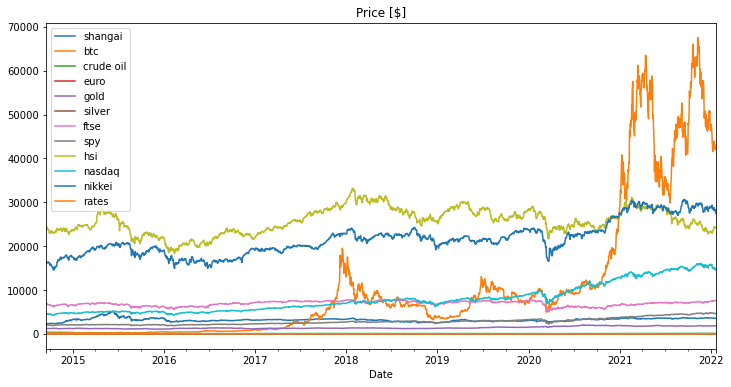

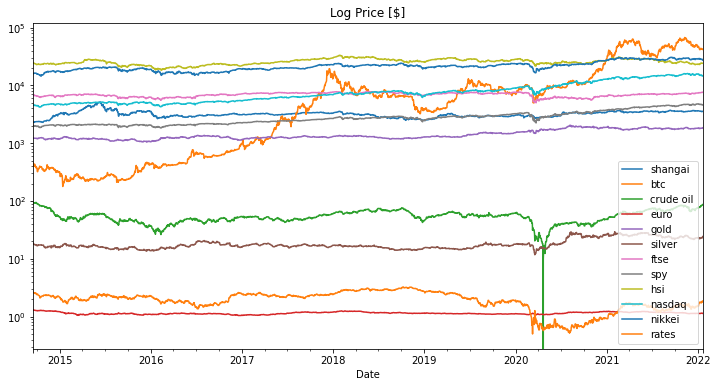

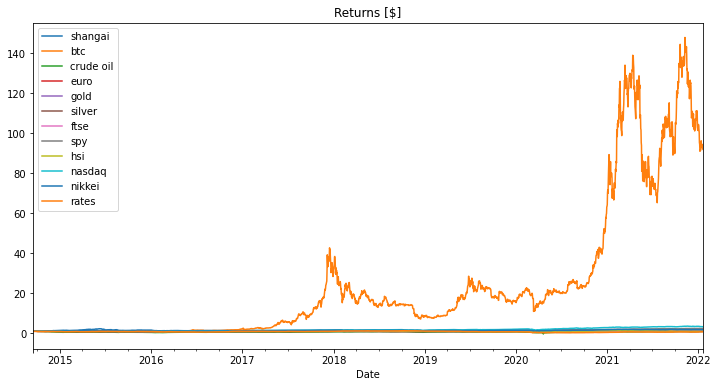

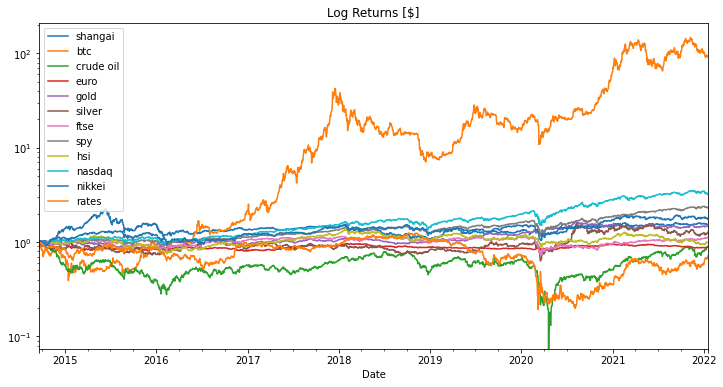

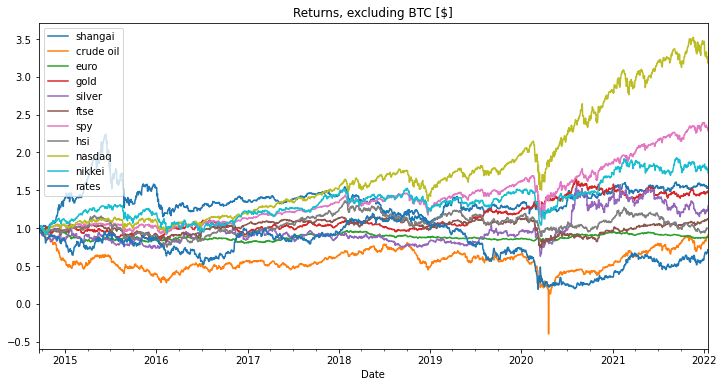

In [9]:
close = close[close.btc.notnull()]
returns = close.pct_change(1)
cumulative = (1 + returns).cumprod()

close.plot(figsize=(12,6),label='Price', title='Price [$]')
close.plot(figsize=(12,6),label='Price (log scale)', logy=True, title='Log Price [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns', title='Returns [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns (log)', logy=True, title='Log Returns [$]')
cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), label='Cumulative Returns', title='Returns, excluding BTC [$]')

Even by using returns as the base metric, we can see that we needed to plot them in a logarithmic scale, for their changes to be made comparable with Bitcoin, given the astonishing returns on the asset since 2010.

### Let's have a look at volume figures to see if it makes sense to add to the model

<AxesSubplot:xlabel='Date'>

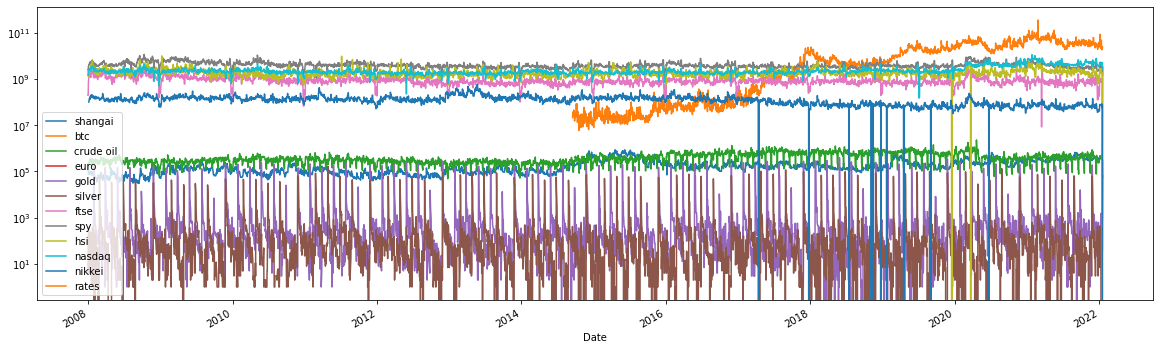

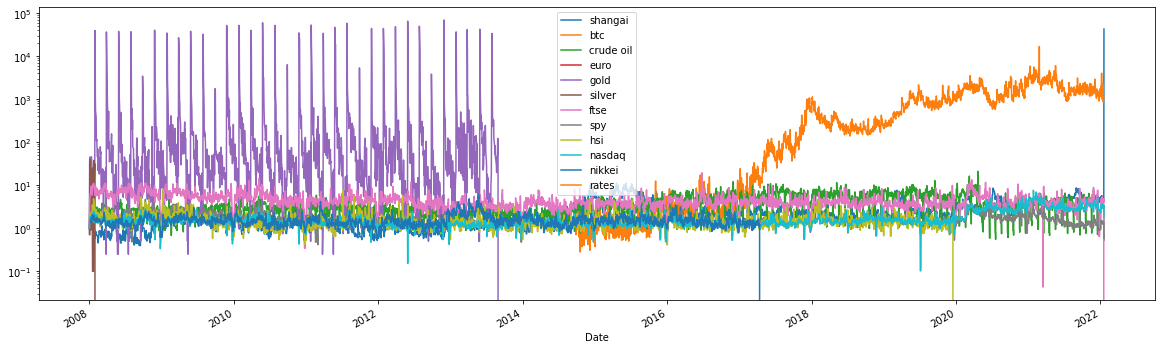

In [26]:
volume.plot(logy=True, figsize=(20,6))
v_returns = volume.pct_change(1)
v_cumulative = (1+v_returns).cumprod()
v_cumulative.plot(logy=True, figsize=(20,6))

## Performing technical analysis calculations

Now we will calculate several indicators typically used in technical analysis of stock prices, such as simple moving averages, the (stochastic) relative strength index and other statistical measures s.a. the expanding standard deviation of Bitcoin price.

### Moving Averages

In [10]:
def transform_ma(data, ma1=4, ma2=96, ma3=200):
    data['MA'+str(ma1)] = round(data['Close'].rolling(ma1).mean(),0)
    data['MA'+str(ma2)] = round(data['Close'].rolling(ma2).mean(),0)
    data['MA'+str(ma3)] = round(data['Close'].rolling(ma3).mean(),0)    
    return data

### (Stochastic) Relative Strenght Index

In [11]:
def transform_rsi(data, alpha=14, smoothK=3, smoothD=3):
    
    data['change'] = data['Close'].pct_change(1)
    data['cum_change'] = (data['change']+1).cumprod()
    data['k'] = 0
    data['d'] = 0

    cond_k = data.change > 0
    cond_d = data.change < 0

    data['k'] = data.k.mask(cond_k, data['change'])
    data['d'] = data.d.mask(cond_d, - data['change'])
    # data['num'] = data['k'].rolling(alpha).mean()
    
    data['num'] = pd.Series.ewm(data['k'], span=alpha).mean()
    data['div'] = pd.Series.ewm(data['d'], span=alpha).mean()
    
    # data['div'] = data['d'].rolling(alpha).mean()
    data['rs'] = data['num']/data['div']
    data['RSI'] = (100 - (100/(1+data['rs'])))
    data['RSImin'] = data['RSI'].rolling(alpha).min()
    data['RSImax'] = data['RSI'].rolling(alpha).max()
    data['stochRSI'] = 100*(data['RSI'] - data['RSImin']) / (data['RSImax'] - data['RSImin'])
    data['smoothK'] = round(data['stochRSI'].rolling(smoothK).mean(),2)
    data['smoothD'] = round(data['smoothK'].rolling(smoothD).mean(),2)
    data['K1'] = data['smoothK'].shift(1)
    data['D1'] = data['smoothD'].shift(1)

    # cond_num_zero = data.num == 0
    # data['RSI'] = data.RSI.mask(cond_num_zero, 0)

    # cond_div_zero = data.div == 0
    # data['RSI'] = data.RSI.mask(cond_div_zero, 100)

    return data

def transform_std(df, confidence=80):
    df['btc_std_dev'] = df['change'].expanding(2).std()
    df['btc_mean'] = df['change'].expanding(2).mean()
    # df['conf_int_p'] = np.percentile(df['change'], (100-confidence)/2)
    # df['conf_int_m'] = np.percentile(df['change'], confidence + (100-confidence)/2)
    df['std_dif'] = (df['Close'] - df['btc_std_dev']).abs()

    return df

In [13]:
btc = yf.Ticker('BTC-USD')
btc = btc.history(start="2008-01-01")

btc.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
# btc = data_ticker['BTCUSD=X']
# btc = btc[btc.Close.notnull()]
btc = transform_std(transform_rsi(transform_ma(btc, ma_values[0], ma_values[1], ma_values[2])))
btc.tail()

Open          High           Low         Close  \
Date                                                                 
2022-01-15  43101.898438  43724.671875  42669.035156  43177.398438   
2022-01-16  43172.039062  43436.808594  42691.023438  43113.878906   
2022-01-17  43118.121094  43179.390625  41680.320312  42250.550781   
2022-01-18  42250.074219  42534.402344  41392.214844  42375.632812   
2022-01-19  42365.046875  42478.304688  41248.902344  41869.394531   

                 Volume      MA4     MA50     MA80    change  cum_change  \
Date                                                                       
2022-01-15  18371348298  43204.0  48215.0  53107.0  0.001803   94.411080   
2022-01-16  17902097845  42996.0  47981.0  52888.0 -0.001471   94.272189   
2022-01-17  21690904261  42910.0  47681.0  52638.0 -0.020024   92.384449   
2022-01-18  22417209227  42729.0  47372.0  52394.0  0.002960   92.657951   
2022-01-19  23606040576  42402.0  47069.0  52151.0 -0.011946   91.551018   

                   k         d       num       div        rs        RSI  \
Date                                                                      
2022-01-15  0.001803  0.000000  0.007580  0.009303  0.814823  44.898193   
2022-01-16  0.000000  0.001471  0.006570  0.008259  0.795470  44.304268   
2022-01-17  0.000000  0.020024  0.005694  0.009827  0.579356  36.683055   
2022-01-18  0.002960  0.000000  0.005329  0.008517  0.625702  38.488105   
2022-01-19  0.000000  0.011946  0.004619  0.008974  0.514646  33.977957   

               RSImin     RSImax   stochRSI  smoothK  smoothD     K1     D1  \
Date                                                                          
2022-01-15  18.789626  48.980272  86.478996    79.15    79.69  83.65  72.94   
2022-01-16  18.789626  48.980272  84.511748    84.94    82.58  79.15  79.69   
2022-01-17  18.789626  48.980272  59.268123    76.75    80.28  84.94  82.58   
2022-01-18  18.789626  48.980272  65.246963    69.68    77.12  76.75  80.28   
2022-01-19  18.789626  48.980272  50.308071    58.27    68.23  69.68  77.12   

            btc_std_dev  btc_mean       std_dif  
Date                                             
2022-01-15     0.038879  0.002463  43177.359558  
2022-01-16     0.038872  0.002462  43113.840034  
2022-01-17     0.038867  0.002453  42250.511914  
2022-01-18     0.038860  0.002454  42375.593953  
2022-01-19     0.038854  0.002448  41869.355678

In [18]:
data_ohlc.head

<bound method NDFrame.head of               Adj Close                                                   \
              000001.SS       BTC-USD        CL=F  EURUSD=X         GC=F   
Date                                                                       
2007-12-31          NaN           NaN   95.980003  1.460110   834.900024   
2008-01-01          NaN           NaN         NaN  1.462010          NaN   
2008-01-02  5272.813965           NaN   99.620003  1.471692   857.000000   
2008-01-03  5319.860840           NaN   99.180000  1.474491   866.400024   
2008-01-04  5361.574219           NaN   97.910004  1.475492   863.099976   
2008-01-07  5393.342773           NaN   95.089996  1.468299   859.599976   
2008-01-08  5386.530762           NaN   96.330002  1.557099   878.000000   
2008-01-09  5435.807129           NaN   95.669998  1.466405   879.500000   
2008-01-10  5456.541016           NaN   93.709999  1.480100   891.700012   
2008-01-11  5484.676758           NaN   92.690002  1.47900

In [14]:
btc.describe()

Open          High           Low         Close        Volume  \
count   2682.000000   2682.000000   2682.000000   2682.000000  2.682000e+03   
mean   10978.432882  11275.160555  10651.378045  10992.095999  1.458993e+10   
std    15894.482866  16324.193079  15399.262287  15899.996391  2.008767e+10   
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06   
25%      601.292511    606.648514    595.965500    602.679245  7.834820e+07   
50%     6229.204834   6368.270020   6082.739990   6233.429932  4.996205e+09   
75%    10307.317383  10487.242432  10051.714355  10311.973633  2.445239e+10   
max    67549.734375  68789.625000  66382.062500  67566.828125  3.509679e+11   

                MA4          MA50          MA80       change   cum_change  \
count   2679.000000   2633.000000   2603.000000  2681.000000  2681.000000   
mean   10980.582680  10771.882643  10591.409527     0.002448    24.043752   
std    15878.738703  15491.411539  15104.658136     0.038854    34.770342   
min      199.000000    232.000000    234.000000    -0.371695     0.389437   
25%      604.000000    610.000000    615.000000    -0.013115     1.318166   
50%     6282.000000   6488.000000   6405.000000     0.001988    13.640030   
75%    10304.000000  10327.000000  10157.500000     0.018269    22.548325   
max    66121.000000  60802.000000  56971.000000     0.252472   147.740658   

                 k            d          num          div           rs  \
count  2682.000000  2682.000000  2682.000000  2682.000000  2681.000000   
mean      0.014034     0.011587     0.014043     0.011627     1.965552   
std       0.024908     0.023733     0.008852     0.008448     2.979301   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.007444     0.005468     0.736549   
50%       0.001976     0.000000     0.011966     0.009466     1.185445   
75%       0.018267     0.013091     0.018930     0.015783     2.154254   
max       0.252472     0.371695     0.078900     0.063441    62.372352   

               RSI       RSImin       RSImax     stochRSI      smoothK  \
count  2681.000000  2668.000000  2668.000000  2668.000000  2666.000000   
mean     55.165176    37.728384    71.524576    52.193369    52.188811   
std      17.841727    15.550275    14.142760    35.161509    31.640394   
min       0.000000     0.000000    18.604388     0.000000     0.000000   
25%      42.414509    26.264281    60.931890    20.528242    23.622500   
50%      54.242729    37.326733    71.593085    52.164567    52.610000   
75%      68.296779    48.531416    83.395290    85.764550    81.815000   
max      98.422025    81.462209    98.422025   100.000000   100.000000   

           smoothD           K1           D1  btc_std_dev     btc_mean  \
count  2664.000000  2665.000000  2663.000000  2680.000000  2680.000000   
mean     52.190871    52.186529    52.184848     0.037494     0.001324   
std      30.164706    31.646113    30.168769     0.003097     0.002798   
min       0.000000     0.000000     0.000000     0.001473    -0.070884   
25%      24.550000    23.620000    24.540000     0.035380     0.000933   
50%      52.275000    52.600000    52.230000     0.038681     0.002220   
75%      80.345000    81.820000    80.350000     0.039162     0.002580   
max     100.000000   100.000000   100.000000     0.061565     0.003865   

            std_dif  
count   2680.000000  
mean   10999.932542  
std    15903.314673  
min      178.061070  
25%      604.223811  
50%     6240.082216  
75%    10314.987676  
max    67566.789052

<AxesSubplot:title={'center':'Standard deviation of daily change'}, xlabel='Date'>

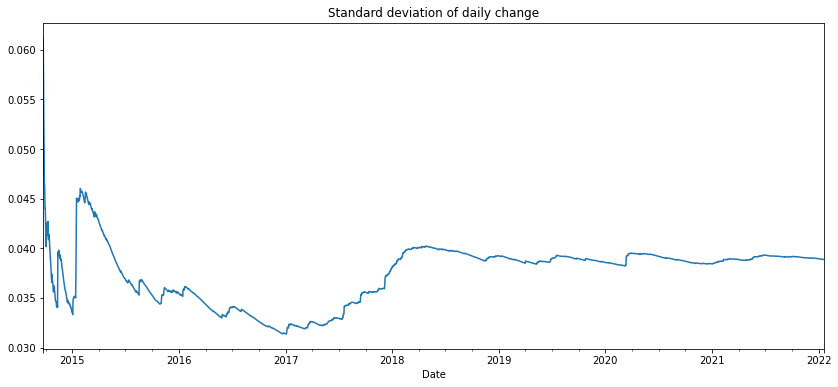

In [29]:
# btc[['High','Low','Close','std_dif']].plot(figsize=(14,6),logy=True, title='Bitcoin Price')
btc[5:]['btc_std_dev'].plot(figsize=(14,6), title='Standard deviation of daily change')

In [30]:
# Initial selection of features to the model

btc = btc[[f'MA{ma_values[0]}',f'MA{ma_values[1]}', f'MA{ma_values[2]}', 'stochRSI', 'RSI','btc_std_dev','std_dif']].fillna(method='bfill')

In [31]:
data = pd.concat([cumulative, btc], axis=1)
data.drop(data.index[0], inplace=True)
data.tail()

shangai        btc  crude oil      euro      gold    silver  \
Date                                                                       
2022-01-15  1.525747  94.411080   0.887736  0.884100  1.471565  1.227616   
2022-01-16  1.525747  94.272189   0.887736  0.884100  1.471565  1.227616   
2022-01-17  1.534590  92.384449   0.887736  0.880518  1.471565  1.227616   
2022-01-18  1.546826  92.657951   0.904787  0.880508  1.468163  1.258479   
2022-01-19  1.541744  91.847155   0.916861  0.875891  1.492871  1.297219   

                ftse       spy       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2022-01-15  1.112389  2.329596  1.000283  3.264605  1.770084  0.681538   
2022-01-16  1.112389  2.329596  1.000283  3.264605  1.770084  0.681538   
2022-01-17  1.122447  2.329596  0.993503  3.264605  1.783253  0.681538   
2022-01-18  1.115427  2.286760  0.989185  3.179811  1.778453  0.717308   
2022-01-19  1.119270  2.287005  0.989803  3.185194  1.728731  0.704615   

                MA4     MA50     MA80   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2022-01-15  43204.0  48215.0  53107.0  86.478996  44.898193     0.038879   
2022-01-16  42996.0  47981.0  52888.0  84.511748  44.304268     0.038872   
2022-01-17  42910.0  47681.0  52638.0  59.268123  36.683055     0.038867   
2022-01-18  42729.0  47372.0  52394.0  65.246963  38.488105     0.038860   
2022-01-19  42402.0  47069.0  52151.0  50.308071  33.977957     0.038854   

                 std_dif  
Date                      
2022-01-15  43177.359558  
2022-01-16  43113.840034  
2022-01-17  42250.511914  
2022-01-18  42375.593953  
2022-01-19  41869.355678

## Getting fundamental Bitcoin data

Fundamental Bitcoin's blockchain data will also be included, such as hashrate, mining difficulty, (daily) number of transactions and cost per transaction.

In [35]:
import quandl

# from settings import QUANDLKEY
quandl_key = os.environ.get("QUANDLKEY")
quandl.ApiConfig.api_key = quandl_key # (insert if available, else there is a ratelimit)

In [34]:

# btc mining is an interesting source, but free data has not the same quality ;)
# btcmining = quandl.get('BITCOINWATCH/MINING') # total btc and marketcap, bad quality data
# btcmining.fillna(method='ffill').plot(legend=None, logy=True)

btc_hrate = quandl.get('BCHAIN/HRATE') # hashrate
btc_diff = quandl.get('BCHAIN/DIFF') # difficulty
btc_ntrat = quandl.get('BCHAIN/NTRAT') # number of transactions
btc_cptra = quandl.get('BCHAIN/CPTRA') # cost per transaction
m2 = quandl.get("FED/M2_N_WM")


LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Nasdaq Data Link account and then include your API key with your requests.

<AxesSubplot:xlabel='Date'>

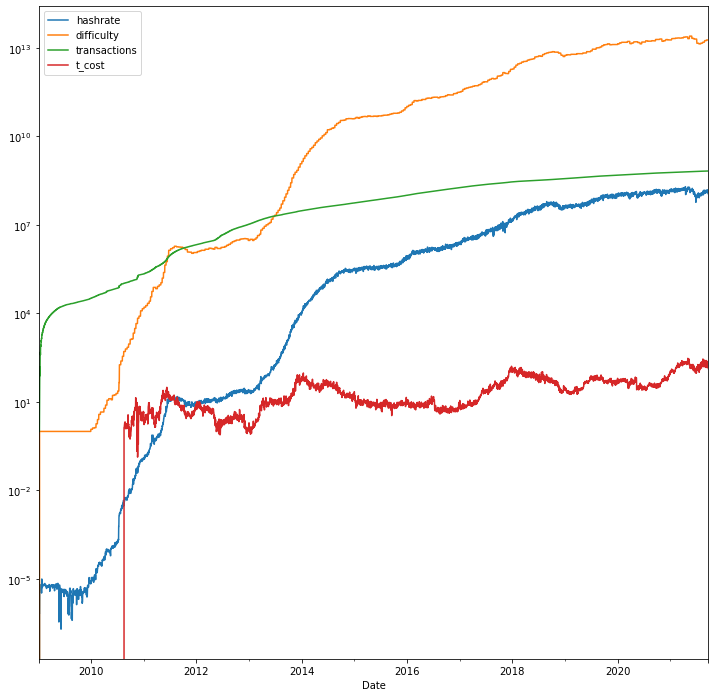

In [18]:
fundamentals = pd.concat([btc_hrate, btc_diff, btc_ntrat, btc_cptra], axis=1) #, m2]
# fundamentals.fillna(method='bfill')
fundamentals.columns = ['hashrate','difficulty','transactions','t_cost'] #, 'm2']
fundamentals.plot(figsize=(12,12), logy=True)

In [28]:
# compare_date = '2014-09-22'
compare_date = '2020-01-21'

(1 + m2[compare_date:].pct_change()).cumprod().plot(logy=True)
(1 + returns.btc[compare_date:]).plot()

NameError: name 'm2' is not defined

In [20]:
m2.tail()

Value
Date               
2021-07-05  20538.1
2021-07-12  20539.7
2021-07-19  20574.1
2021-07-26  20530.2
2021-08-02  20661.0

In [21]:
df = pd.concat([data,fundamentals], axis=1)
df = df[df.btc.notnull()]

## Normalizing functions for dataframes

In order to make sure that no feature becomes more important in the dataset than the others, we will create functions to normalize these and bring them back to the dataset's original state. This will be used later before saving the feed-in dataset.

In [22]:
def min_max_scaler(df, log=False):
    if log:
        df = np.log(df)
    normalized_df=(df-df.min())/(df.max()-df.min())

    return normalized_df, df.min(), df.max()

def back_min_max(ndf,mindf,maxdf, log=False):
    df = ndf*(maxdf-mindf) + mindf
    if log:
        df = np.exp(df)
        
    return df

In [23]:
def standardizer(df, log=False):
    '''
    Returns log normalized and standartized df, mean and standard deviation of raw dataframe
    '''
    if log:
        df = np.log(df)
    ndf = (df-df.mean())/df.std()

    return ndf, df.mean(), df.std()

def back_standardizer(ndf, mean, std, log=False):
    df = ndf*std + mean
    if log:
        df = np.exp(df)
    return df

## Labelling buy, sell and no-trade signals

Following our end-goal, we will need to predict whether prices are going to go up or down. For this, the condition for the labels will be that if price goes up by more than a certain confidence level it's a buy, down a certain confidence level or less a sell, and values in between labelled as no-trade zone.

We will need to shift by one this values to become the predicted labels of our trained model.

In [24]:
returns.btc.describe()

count    2562.000000
mean        0.002553
std         0.039152
min        -0.371695
25%        -0.012831
50%         0.001996
75%         0.018263
max         0.252472
Name: btc, dtype: float64

Given the confidence intervals above, I will take the top 75% interval +2.3% as buy label (1), -1.36% for the sell label (2), and the values in between as no-trade (0). The objective of the classification problem will be to **predict the next day's label to give a trading signal**.

(array([  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   2.,   1.,   0.,   2.,   1.,   4.,   0.,
          2.,   1.,   6.,   5.,   8.,  11.,   1.,   9.,   6.,  10.,  12.,
         15.,  31.,  22.,  25.,  28.,  28.,  47.,  58.,  65.,  79., 111.,
        121., 190., 259., 282., 218., 175., 122.,  94.,  91.,  63.,  56.,
         54.,  38.,  36.,  21.,  20.,  18.,  18.,  15.,   8.,   6.,   6.,
          7.,  13.,   7.,   4.,   5.,   2.,   4.,   2.,   0.,   0.,   1.,
          3.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

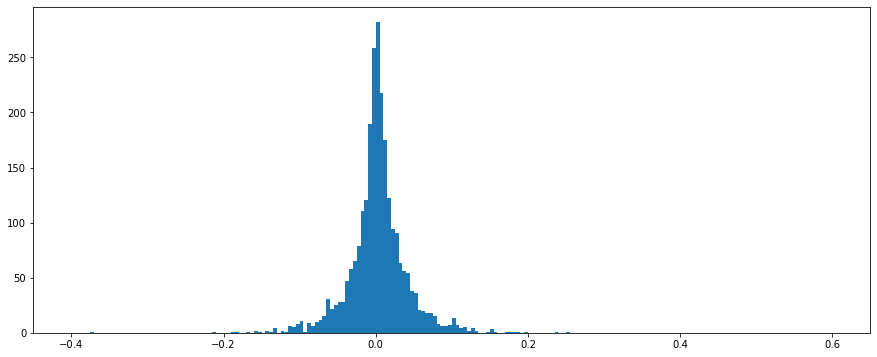

In [25]:
plt.figure(figsize = (15,6))
plt.hist(returns.btc, bins=200 , range=(-0.4, 0.6), label='Distribution of Bitcoin daily returns')

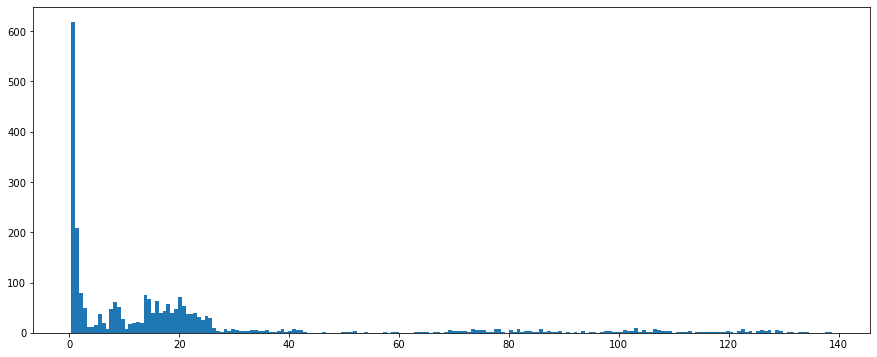

In [26]:
plt.figure(figsize = (15,6))
plt.hist(cumulative.btc, bins=200, label='Distribution of Bitcoin daily returns')

<AxesSubplot:>

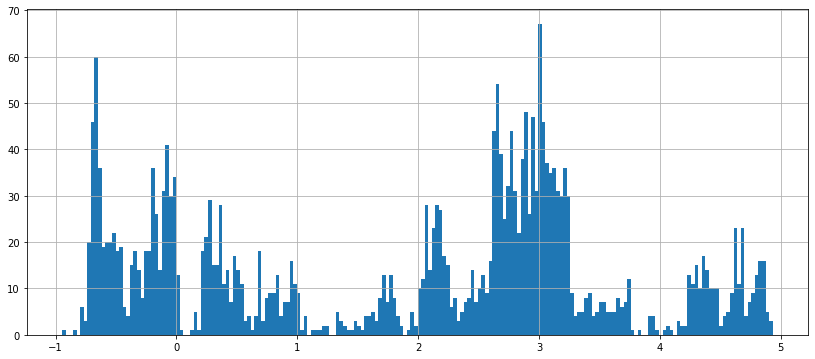

In [27]:
logy = np.log(cumulative.btc)
logy.hist(bins=200, figsize=(14,6))

In [28]:
cumulative.columns

Index(['shangai', 'btc', 'crude oil', 'euro', 'gold', 'silver', 'ftse', 'spy',
       'hsi', 'nasdaq', 'nikkei', 'rates'],
      dtype='object')

shit


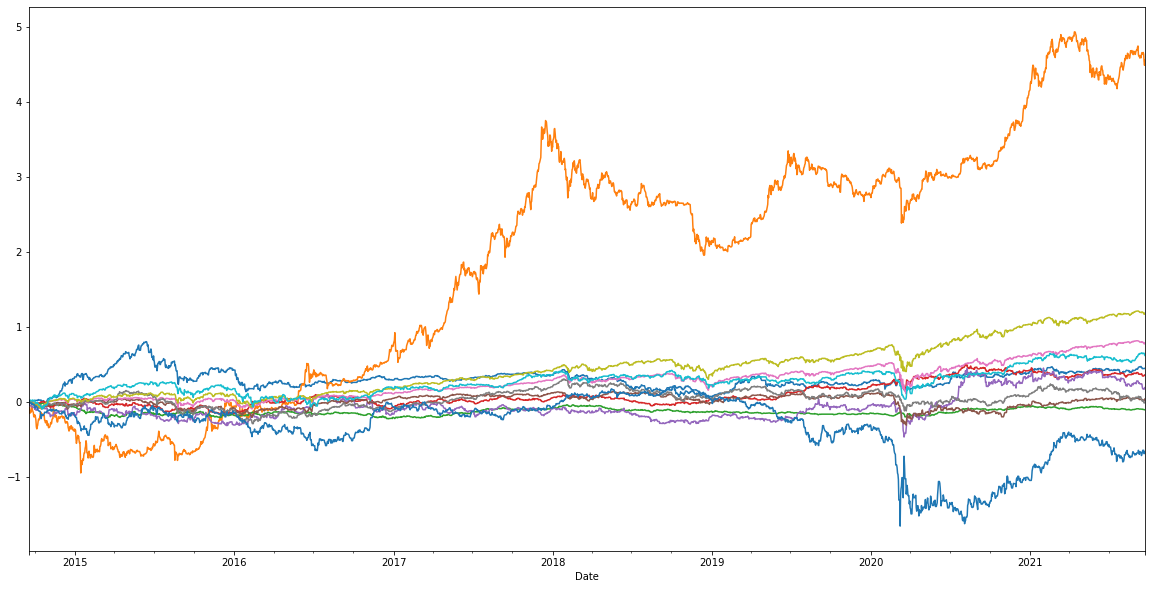

In [29]:
for x in ['shangai', 'btc', 'oil', 'euro', 'gold', 'silver', 'ftse', 'spy',
       'hsi', 'nasdaq', 'nikkei', 'rates']:
    try:
        exec(f'np.log(cumulative.{x}).plot(figsize=(20,10))')
    except Exception:
        print('shit')

In [30]:
labels = 0

In [31]:
labels = pd.DataFrame(returns.btc)
labels['returns'] = returns.btc
labels = pd.concat([labels.returns, close.btc[close.btc.notnull()]], axis =1)
labels.rename(columns={'btc':'btc_close'}, inplace=True)

In [32]:
buy_cond = labels.returns > 0.022985 # returns.btc.describe()['75%']
sell_cond = labels.returns < -0.013636 # returns.btc.describe()['25%']

labels['c_label'] = 0
labels['c_label'] = labels['c_label'].mask(buy_cond, 1)
labels['c_label'] = labels['c_label'].mask(sell_cond, -1)


# Backtesting, used for later

labels['bkt_returns'] = 0
labels['bkt_returns'] = labels['bkt_returns'].mask(buy_cond, labels.returns)
labels['bkt_returns'] = labels['bkt_returns'].mask(sell_cond, labels.returns)

labels.head()

returns   btc_close  c_label  bkt_returns
Date                                                  
2014-09-17       NaN  457.334015        0     0.000000
2014-09-18 -0.071926  424.440002       -1    -0.071926
2014-09-19 -0.069843  394.795990       -1    -0.069843
2014-09-20  0.035735  408.903992        1     0.035735
2014-09-21 -0.024659  398.821014       -1    -0.024659

In [33]:
# row data cleaning
df.describe().loc['count'].min()

2558.0

### Data cleaning
I'll consider the minimal available records as starting point and select the training data. Dates afterwards will be test data. We will also get rid of NA values that aren't useful for our analysis.

In [34]:
df = pd.concat([df,labels], axis=1)
df.rename(columns={'btc':'btc_cumulative'}, inplace=True)

df = df[-int(df.describe().loc['count'].min()):]
df.describe()

shangai  btc_cumulative    crude oil         euro         gold  \
count  2558.000000     2558.000000  2558.000000  2558.000000  2558.000000   
mean      1.373631       19.803134     0.563047     0.882251     1.126419   
std       0.172701       29.019800     0.129117     0.038914     0.199948   
min       0.992189        0.389437    -0.398538     0.801791     0.851264   
25%       1.264952        1.262637     0.484114     0.854667     0.988496   
50%       1.359293       11.657167     0.557191     0.873902     1.043827   
75%       1.461468       21.057722     0.646685     0.911336     1.228005   
max       2.238557      138.855749     1.001589     0.991889     1.661941   

            silver         ftse          spy          hsi       nasdaq  \
count  2558.000000  2558.000000  2558.000000  2558.000000  2558.000000   
mean      0.960910     1.014699     1.358932     1.057721     1.663392   
std       0.198877     0.081052     0.327804     0.121240     0.630619   
min       0.628784     0.736466     0.913823     0.751529     0.923605   
25%       0.836629     0.956396     1.059602     0.968446     1.120481   
50%       0.898435     1.031751     1.324710     1.064014     1.548259   
75%       0.965922     1.080701     1.497554     1.154431     1.861515   
max       1.575202     1.161719     2.266696     1.360090     3.369945   

            nikkei        rates           MA4          MA96         MA200  \
count  2558.000000  2558.000000   2554.000000   2554.000000   2554.000000   
mean      1.334501     0.762862   9030.154268   8238.926782   7389.940486   
std       0.220825     0.250978  13247.953186  12022.153444  10512.367267   
min       0.914646     0.191923    199.000000    237.000000    246.000000   
25%       1.192541     0.613077    577.000000    486.500000    450.250000   
50%       1.307460     0.808654   5302.000000   4916.000000   4960.000000   
75%       1.434973     0.923077   9581.500000   9215.000000   8908.000000   
max       1.930313     1.243846  62875.000000  54511.000000  46153.000000   

          stochRSI          RSI  btc_std_dev       std_dif      hashrate  \
count  2554.000000  2554.000000  2554.000000   2554.000000  2.557000e+03   
mean     52.275709    55.502958     0.037423   9054.815329  4.740720e+07   
std      35.133917    17.779965     0.003025  13281.866794  5.324898e+07   
min       0.000000     5.342375     0.031363    178.061070  2.205477e+05   
25%      20.764469    42.862677     0.035223    576.774234  1.456455e+06   
50%      52.479670    54.651400     0.038630   5309.133322  2.565676e+07   
75%      85.867553    68.535753     0.039185   9612.148390  9.440882e+07   
max     100.000000    98.422025     0.061243  63503.418201  1.985140e+08   

         difficulty  transactions       t_cost      returns     btc_close  \
count  2.557000e+03  2.557000e+03  2557.000000  2558.000000   2558.000000   
mean   6.572127e+12  3.184685e+08    46.723953     0.002609   9056.646882   
std    7.421643e+12  1.928811e+08    50.011991     0.039119  13271.741540   
min    2.982973e+10  4.733937e+07     3.442916    -0.371695    178.102997   
25%    2.018932e+11  1.378210e+08     9.008135    -0.012780    577.446762   
50%    3.462542e+12  3.063684e+08    30.087318     0.002000   5331.218994   
75%    1.367259e+13  4.860900e+08    58.346599     0.018263   9630.412598   
max    2.504649e+13  6.719732e+08   300.310549     0.252472  63503.457031   

           c_label  bkt_returns  
count  2558.000000  2558.000000  
mean     -0.032056     0.000734  
std       0.673358     0.038533  
min      -1.000000    -0.371695  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     0.252472

In [35]:
df.head()

shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2014-09-22  0.992189        0.879340   0.969286  0.990921  0.985742  0.948347   
2014-09-23  1.000791        0.952894   0.969710  0.991698  0.989145  0.949097   
2014-09-24  1.015461        0.925374   0.982843  0.991889  0.987200  0.945346   
2014-09-25  1.016123        0.899942   0.979983  0.986033  0.989306  0.931201   
2014-09-26  1.017256        0.884310   0.990680  0.984411  0.983555  0.936452   

                ftse       spy       hsi    nasdaq    nikkei     rates    MA4  \
Date                                                                            
2014-09-22  0.998923  0.996363  0.982732  0.992438  1.019966  0.986923  401.0   
2014-09-23  0.984545  0.990607  0.977875  0.988273  1.019966  0.975000  411.0   
2014-09-24  0.988998  0.998366  0.981343  0.998472  1.017546  0.988077  415.0   
2014-09-25  0.979177  0.982224  0.975046  0.979080  1.030554  0.965769  418.0   
2014-09-26  0.980607  0.990647  0.971366  0.989040  1.021474  0.975000  419.0   

             MA96  MA200   stochRSI        RSI  btc_std_dev     std_dif  \
Date                                                                      
2014-09-22  368.0  311.0  63.913817  24.678341     0.047468  402.104541   
2014-09-23  368.0  311.0  63.913817  55.080110     0.061243  435.729742   
2014-09-24  368.0  311.0  63.913817  47.450164     0.056546  423.148440   
2014-09-25  368.0  311.0  63.913817  41.185784     0.052730  411.521275   
2014-09-26  368.0  311.0  63.913817  37.568786     0.049358  404.375630   

                 hashrate    difficulty  transactions     t_cost   returns  \
Date                                                                         
2014-09-22  232806.520022  2.982973e+10    47339374.0  22.511639  0.008352   
2014-09-23  241703.584482  2.982973e+10    47420478.0  21.770173  0.083647   
2014-09-24  241703.584482  2.982973e+10    47365583.0  24.075886 -0.028881   
2014-09-25  241703.584482  2.982973e+10    47571320.0  21.131105 -0.027483   
2014-09-26  220547.690039  3.466143e+10    47638262.0  19.222254 -0.017370   

             btc_close  c_label  bkt_returns  
Date                                          
2014-09-22  402.152008        0     0.000000  
2014-09-23  435.790985        1     0.083647  
2014-09-24  423.204987       -1    -0.028881  
2014-09-25  411.574005       -1    -0.027483  
2014-09-26  404.424988       -1    -0.017370

In [36]:
df.tail()

shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2021-09-18  1.565917      105.564777   0.762233  0.908049  1.417207  1.194610   
2021-09-19  1.565917      103.338517   0.762233  0.908049  1.417207  1.194610   
2021-09-20  1.565917       93.681641   0.744440  0.905152  1.427252  1.187537   
2021-09-21  1.565917       88.980208   0.747299  0.905173  1.438756  1.209505   
2021-09-22  1.572209       95.092748   0.762550  0.902737  1.432680  1.215775   

                ftse       spy       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2021-09-18  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   
2021-09-19  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   
2021-09-20  1.018139  2.177156  0.988625  3.225184  1.919610  0.503462   
2021-09-21  1.029509  2.175387  0.993647  3.232307  1.878050  0.509231   
2021-09-22  1.044606  2.196096  0.993647  3.265284  1.865443  0.513846   

                MA4     MA96    MA200   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2021-09-18  47876.0  40694.0  45923.0  56.960120  57.573914     0.039128   
2021-09-19  47647.0  40765.0  45906.0  39.438367  50.234442     0.039123   
2021-09-20  46412.0  40812.0  45878.0   0.000000  30.412210     0.039162   
2021-09-21  44769.0  40840.0  45837.0   0.000000  24.437057     0.039168   
2021-09-22  43572.0  40920.0  45809.0  54.003722  42.332193     0.039182   

                 std_dif      hashrate    difficulty  transactions  \
Date                                                                 
2021-09-18  48278.324153  1.418905e+08  1.841516e+13   671275196.0   
2021-09-19  47260.179627  1.464676e+08  1.841516e+13   671504021.0   
2021-09-20  42843.761620  1.501293e+08  1.841516e+13   671703920.0   
2021-09-21  40693.636613  1.139289e+08  1.863300e+13   671973190.0   
2021-09-22  43489.109256           NaN           NaN           NaN   

                t_cost   returns     btc_close  c_label  bkt_returns  
Date                                                                  
2021-09-18  209.936602  0.021386  48278.363281        0     0.000000  
2021-09-19  240.040655 -0.021089  47260.218750       -1    -0.021089  
2021-09-20  172.048382 -0.093449  42843.800781       -1    -0.093449  
2021-09-21  136.275940 -0.050185  40693.675781       -1    -0.050185  
2021-09-22         NaN  0.068696  43489.148438        1     0.068696

In [37]:
# Fill NAs
df.fillna(method='ffill', inplace=True)

In [38]:
df['returns_label'] = df['c_label']
df['c_label'] = df['c_label'].shift(-1)
df['r_label'] = df['btc_close'].shift(-1)

df.tail()

shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2021-09-18  1.565917      105.564777   0.762233  0.908049  1.417207  1.194610   
2021-09-19  1.565917      103.338517   0.762233  0.908049  1.417207  1.194610   
2021-09-20  1.565917       93.681641   0.744440  0.905152  1.427252  1.187537   
2021-09-21  1.565917       88.980208   0.747299  0.905173  1.438756  1.209505   
2021-09-22  1.572209       95.092748   0.762550  0.902737  1.432680  1.215775   

                ftse       spy       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2021-09-18  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   
2021-09-19  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   
2021-09-20  1.018139  2.177156  0.988625  3.225184  1.919610  0.503462   
2021-09-21  1.029509  2.175387  0.993647  3.232307  1.878050  0.509231   
2021-09-22  1.044606  2.196096  0.993647  3.265284  1.865443  0.513846   

                MA4     MA96    MA200   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2021-09-18  47876.0  40694.0  45923.0  56.960120  57.573914     0.039128   
2021-09-19  47647.0  40765.0  45906.0  39.438367  50.234442     0.039123   
2021-09-20  46412.0  40812.0  45878.0   0.000000  30.412210     0.039162   
2021-09-21  44769.0  40840.0  45837.0   0.000000  24.437057     0.039168   
2021-09-22  43572.0  40920.0  45809.0  54.003722  42.332193     0.039182   

                 std_dif      hashrate    difficulty  transactions  \
Date                                                                 
2021-09-18  48278.324153  1.418905e+08  1.841516e+13   671275196.0   
2021-09-19  47260.179627  1.464676e+08  1.841516e+13   671504021.0   
2021-09-20  42843.761620  1.501293e+08  1.841516e+13   671703920.0   
2021-09-21  40693.636613  1.139289e+08  1.863300e+13   671973190.0   
2021-09-22  43489.109256  1.139289e+08  1.863300e+13   671973190.0   

                t_cost   returns     btc_close  c_label  bkt_returns  \
Date                                                                   
2021-09-18  209.936602  0.021386  48278.363281     -1.0     0.000000   
2021-09-19  240.040655 -0.021089  47260.218750     -1.0    -0.021089   
2021-09-20  172.048382 -0.093449  42843.800781     -1.0    -0.093449   
2021-09-21  136.275940 -0.050185  40693.675781      1.0    -0.050185   
2021-09-22  136.275940  0.068696  43489.148438      NaN     0.068696   

            returns_label       r_label  
Date                                     
2021-09-18              0  47260.218750  
2021-09-19             -1  42843.800781  
2021-09-20             -1  40693.675781  
2021-09-21             -1  43489.148438  
2021-09-22              1           NaN

# Normalization step
### Pick your poison

In [39]:
# ndf, mindf, maxdf = min_max_scaler(df, log=False)

ndf, mean, std = standardizer(df, log=False)

In [40]:
ndf.tail()

shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2021-09-18  1.113411        2.955280   1.542675  0.662933  1.454316  1.175096   
2021-09-19  1.113411        2.878565   1.542675  0.662933  1.454316  1.175096   
2021-09-20  1.113411        2.545797   1.404871  0.588485  1.504556  1.139533   
2021-09-21  1.113411        2.383789   1.427018  0.589029  1.562088  1.249996   
2021-09-22  1.149841        2.594422   1.545136  0.526442  1.531701  1.281518   

                ftse       spy       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2021-09-18  0.151065  2.610785 -0.291899  2.591329  2.649652 -0.940077   
2021-09-19  0.151065  2.610785 -0.291899  2.591329  2.649652 -0.940077   
2021-09-20  0.042441  2.496080 -0.569906  2.476602  2.649652 -1.033558   
2021-09-21  0.182724  2.490684 -0.528491  2.487899  2.461446 -1.010571   
2021-09-22  0.368986  2.553859 -0.528491  2.540192  2.404355 -0.992181   

                 MA4      MA96     MA200  stochRSI       RSI  btc_std_dev  \
Date                                                                        
2021-09-18  2.934351  2.701412  3.668003  0.131564  0.115363     0.563068   
2021-09-19  2.917052  2.707323  3.666385 -0.366990 -0.297532     0.561463   
2021-09-20  2.823759  2.711235  3.663719 -1.489145 -1.412665     0.574177   
2021-09-21  2.699645  2.713566  3.659816 -1.489145 -1.748808     0.576236   
2021-09-22  2.609222  2.720225  3.657150  0.047444 -0.742086     0.580927   

             std_dif  hashrate  difficulty  transactions    t_cost   returns  \
Date                                                                           
2021-09-18  2.955280  1.773685    1.594596      1.827582  3.261364  0.479998   
2021-09-19  2.878565  1.859633    1.594596      1.828767  3.863042 -0.605782   
2021-09-20  2.545797  1.928391    1.594596      1.829803  2.504108 -2.455521   
2021-09-21  2.383789  1.248633    1.623938      1.831199  1.789139 -1.349568   
2021-09-22  2.594422  1.248633    1.623938      1.831199  1.789139  1.689383   

            btc_close   c_label  bkt_returns  returns_label   r_label  
Date                                                                   
2021-09-18   2.955280 -1.437189    -0.019043       0.047607  2.877987  
2021-09-19   2.878565 -1.437189    -0.566342      -1.437488  2.545255  
2021-09-20   2.545797 -1.437189    -2.444213      -1.437488  2.383266  
2021-09-21   2.383789  1.532421    -1.321440      -1.437488  2.593876  
2021-09-22   2.594422       NaN     1.763730       1.532701       NaN

## Correlation between all features and labels used

In [41]:
# Correlation of BTC with features

cor_list = df.corr()['btc_cumulative'].sort_values(ascending=False).round(2)
cor_list.drop(index=['btc_cumulative', 'btc_close', 'std_dif', 'MA4', 'r_label', 'MA96', 't_cost',
    'MA200', 'transactions', 'btc_std_dev',
    'RSI', 'bkt_returns', 'returns', 'stochRSI',
    'returns_label', 'c_label', 'difficulty', 'hashrate' ])

nasdaq       0.88
spy          0.88
nikkei       0.87
silver       0.77
gold         0.71
euro         0.44
hsi          0.42
crude oil    0.31
shangai      0.24
ftse         0.07
rates       -0.36
Name: btc_cumulative, dtype: float64

In [42]:
# Normalized correlation does not change, uncomment below to see

ndf.corr().btc_cumulative

shangai           0.241604
btc_cumulative    1.000000
crude oil         0.306096
euro              0.442835
gold              0.711158
silver            0.765093
ftse              0.068098
spy               0.876279
hsi               0.424291
nasdaq            0.884846
nikkei            0.868866
rates            -0.358708
MA4               0.998870
MA96              0.942198
MA200             0.892766
stochRSI          0.000400
RSI               0.035377
btc_std_dev       0.292687
std_dif           1.000000
hashrate          0.767785
difficulty        0.772341
transactions      0.752163
t_cost            0.924940
returns           0.019500
btc_close         1.000000
c_label          -0.030296
bkt_returns       0.021431
returns_label    -0.003270
r_label           0.998650
Name: btc_cumulative, dtype: float64

<AxesSubplot:>

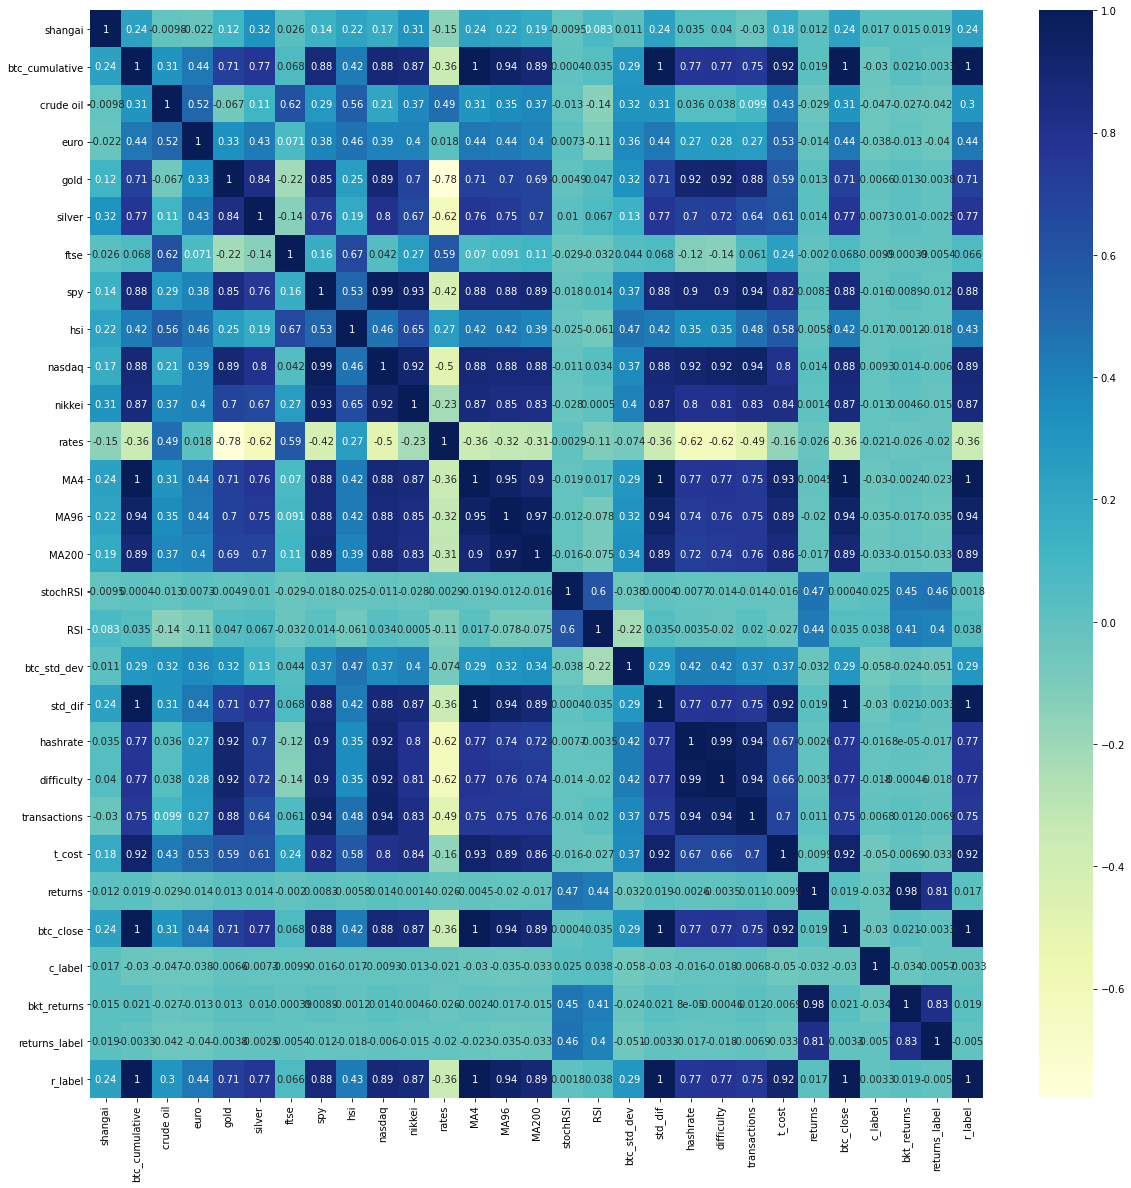

In [43]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, ax=ax,
            annot=True, 
            cmap="YlGnBu")

In [44]:
# Description of normalized features
print(ndf.shape)
ndf.describe()

(2558, 29)


shangai  btc_cumulative     crude oil          euro          gold  \
count  2.558000e+03    2.558000e+03  2.558000e+03  2.558000e+03  2.558000e+03   
mean   3.777710e-16    8.888729e-17 -1.777746e-16 -2.111073e-16 -8.888729e-16   
std    1.000000e+00    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.208687e+00   -6.689811e-01 -7.447405e+00 -2.067622e+00 -1.376133e+00   
25%   -6.292898e-01   -6.388913e-01 -6.113351e-01 -7.088375e-01 -6.897918e-01   
50%   -8.302089e-02   -2.807038e-01 -4.535362e-02 -2.145538e-01 -4.130673e-01   
75%    5.086085e-01    4.323213e-02  6.477685e-01  7.474010e-01  5.080644e-01   
max    5.008241e+00    4.102462e+00  3.396469e+00  2.817416e+00  2.678305e+00   

             silver          ftse           spy          hsi       nasdaq  \
count  2.558000e+03  2.558000e+03  2.558000e+03  2558.000000  2558.000000   
mean  -3.999928e-16 -2.888837e-16 -2.666619e-16     0.000000     0.000000   
std    1.000000e+00  1.000000e+00  1.000000e+00     1.000000     1.000000   
min   -1.670008e+00 -3.432793e+00 -1.357854e+00    -2.525507    -1.173113   
25%   -6.249170e-01 -7.193361e-01 -9.131387e-01    -0.736352    -0.860918   
50%   -3.141379e-01  2.103800e-01 -1.043979e-01     0.051909    -0.182571   
75%    2.520019e-02  8.143155e-01  4.228822e-01     0.797675     0.314173   
max    3.088806e+00  1.813900e+00  2.769231e+00     2.493982     2.706157   

             nikkei         rates           MA4          MA96         MA200  \
count  2.558000e+03  2.558000e+03  2.558000e+03  2.558000e+03  2.558000e+03   
mean  -1.777746e-16  2.222182e-16 -8.888729e-17 -8.888729e-17  4.444364e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.901306e+00 -2.274856e+00 -6.672228e-01 -6.663420e-01 -6.803582e-01   
25%   -6.428664e-01 -5.968047e-01 -6.386494e-01 -6.454064e-01 -6.608188e-01   
50%   -1.224566e-01  1.824545e-01 -2.805656e-01 -2.745180e-01 -2.301667e-01   
75%    4.549829e-01  6.383635e-01  4.360026e-02  8.369660e-02  1.444377e-01   
max    2.698118e+00  1.916440e+00  4.067392e+00  3.851578e+00  3.689898e+00   

           stochRSI           RSI   btc_std_dev       std_dif      hashrate  \
count  2.558000e+03  2.558000e+03  2.558000e+03  2.558000e+03  2.558000e+03   
mean   1.388864e-16 -2.111073e-16 -1.911077e-15 -4.444364e-17  8.888729e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.489145e+00 -2.823012e+00 -2.004857e+00 -6.689815e-01 -8.865427e-01   
25%   -8.980556e-01 -7.114032e-01 -7.256319e-01 -6.388910e-01 -8.633295e-01   
50%    9.258275e-03 -4.426301e-02  3.985912e-01 -2.807039e-01 -4.086775e-01   
75%    9.557197e-01  7.323730e-01  5.818723e-01  4.323201e-02  8.824874e-01   
max    1.356194e+00  2.413344e+00  7.877027e+00  4.102462e+00  2.836942e+00   

        difficulty  transactions        t_cost       returns    btc_close  \
count  2558.000000   2558.000000  2.558000e+03  2.558000e+03  2558.000000   
mean      0.000000      0.000000  1.333309e-16 -1.527750e-17     0.000000   
std       1.000000      1.000000  1.000000e+00  1.000000e+00     1.000000   
min      -0.881869     -1.405748 -8.657400e-01 -9.568342e+00    -0.668981   
25%      -0.858692     -0.936547 -7.543874e-01 -3.933899e-01    -0.638891   
50%      -0.419490     -0.063014 -3.321105e-01 -1.556221e-02    -0.280704   
75%       0.955783      0.869011  2.317770e-01  4.001628e-01     0.043232   
max       2.487822      1.831199  5.067631e+00  6.387259e+00     4.102462   

            c_label   bkt_returns  returns_label       r_label  
count  2.557000e+03  2.558000e+03   2.558000e+03  2.557000e+03  
mean  -3.056695e-17 -1.805523e-17  -3.611046e-17  8.892205e-17  
std    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  
min   -1.437189e+00 -9.665214e+00  -1.437488e+00 -6.691609e-01  
25%    4.761595e-02 -1.904287e-02   4.760662e-02 -6.390727e-01  
50%    4.761595e-02 -1.904287e-02   4.760662e-02 -2.804249e-01  
75%    4.761595

## Splitting the data for training and testing

We will take as training data from beginning of time until 2018, and test data from 2018-01-01 onwards.

<AxesSubplot:title={'center':'BTC price (log scale)'}, xlabel='Date'>

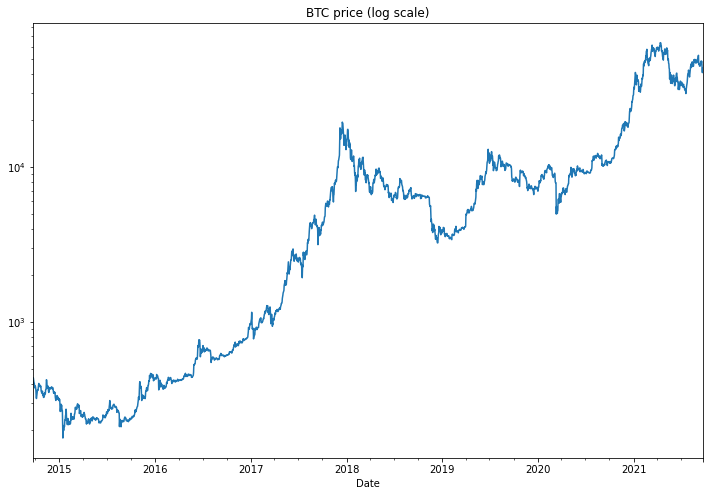

In [45]:
df.btc_close.loc[:].plot(figsize=(12,8), logy=True, title='BTC price (log scale)')

In [46]:
train_x = df.loc[:'2018-01-01']
train_nx = ndf.loc[:'2018-01-01']

test_x = df.loc['2018-01-01':]
test_nx = ndf.loc['2018-01-01':]

# Dropping last column of test (since they are shifted)
test_x.drop(test_x.index[-1], inplace=True)
test_nx.drop(test_nx.index[-1], inplace=True)

# Create labels for regression (price forecast) and classification (trading prediction)
train_y = train_x[['r_label', 'c_label']]
train_ny = train_nx[['r_label', 'c_label']]

test_y = test_x[['r_label', 'c_label']]
test_ny = test_nx[['r_label', 'c_label']]

test_x.tail()

/Users/rj/anaconda3/envs/finance/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2021-09-17  1.565917      103.354481   0.762233  0.908049  1.417207  1.194610   
2021-09-18  1.565917      105.564777   0.762233  0.908049  1.417207  1.194610   
2021-09-19  1.565917      103.338517   0.762233  0.908049  1.417207  1.194610   
2021-09-20  1.565917       93.681641   0.744440  0.905152  1.427252  1.187537   
2021-09-21  1.565917       88.980208   0.747299  0.905173  1.438756  1.209505   

                ftse       spy       hsi    nasdaq   nikkei     rates  \
Date                                                                    
2021-09-17  1.026943  2.214757  1.022331  3.297533  1.91961  0.526923   
2021-09-18  1.026943  2.214757  1.022331  3.297533  1.91961  0.526923   
2021-09-19  1.026943  2.214757  1.022331  3.297533  1.91961  0.526923   
2021-09-20  1.018139  2.177156  0.988625  3.225184  1.91961  0.503462   
2021-09-21  1.029509  2.175387  0.993647  3.232307  1.87805  0.509231   

                MA4     MA96    MA200   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2021-09-17  47580.0  40610.0  45923.0  42.038695  51.323661     0.039134   
2021-09-18  47876.0  40694.0  45923.0  56.960120  57.573914     0.039128   
2021-09-19  47647.0  40765.0  45906.0  39.438367  50.234442     0.039123   
2021-09-20  46412.0  40812.0  45878.0   0.000000  30.412210     0.039162   
2021-09-21  44769.0  40840.0  45837.0   0.000000  24.437057     0.039168   

                 std_dif      hashrate    difficulty  transactions  \
Date                                                                 
2021-09-17  47267.480397  1.345671e+08  1.841516e+13   671003106.0   
2021-09-18  48278.324153  1.418905e+08  1.841516e+13   671275196.0   
2021-09-19  47260.179627  1.464676e+08  1.841516e+13   671504021.0   
2021-09-20  42843.761620  1.501293e+08  1.841516e+13   671703920.0   
2021-09-21  40693.636613  1.139289e+08  1.863300e+13   671973190.0   

                t_cost   returns     btc_close  c_label  bkt_returns  \
Date                                                                   
2021-09-17  164.585875 -0.010795  47267.519531      0.0     0.000000   
2021-09-18  209.936602  0.021386  48278.363281     -1.0     0.000000   
2021-09-19  240.040655 -0.021089  47260.218750     -1.0    -0.021089   
2021-09-20  172.048382 -0.093449  42843.800781     -1.0    -0.093449   
2021-09-21  136.275940 -0.050185  40693.675781      1.0    -0.050185   

            returns_label       r_label  
Date                                     
2021-09-17              0  48278.363281  
2021-09-18              0  47260.218750  
2021-09-19             -1  42843.800781  
2021-09-20             -1  40693.675781  
2021-09-21             -1  43489.148438

In [47]:
# Drop labels and unneeded columns on train & test feature data sets
drop_list = ['r_label','c_label','bkt_returns']
drop_df = [train_x, train_nx, test_x, test_nx]

for x in drop_df:
    x.drop(columns=drop_list, inplace=True)
#     x['ts'] = x['Date'].datetime.astype('int64') // 10**9
#     x.set_index('ts')
#     x.drop(columns=['ts'], inplace=True)

/Users/rj/anaconda3/envs/finance/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Storing the data for future use

In [48]:
# Storing original and normalized data in CSVs
store_list = [train_x, train_nx, test_x, test_nx, train_y, train_ny, test_y, test_ny]
# !mkdir data
store_name = ['data/train_x.csv', 'data/train_nx.csv', 'data/test_x.csv', 'data/test_nx.csv', 'data/train_y.csv', 'data/train_ny.csv', 'data/test_y.csv', 'data/test_ny.csv']

for i in range(len(store_list)):
    store_list[i].to_csv(store_name[i])

## Recap and Discussion

### What was done?

We started by obtaining and preprocessing the data, specifically:
- Used Quandl and yfinance to source stock market, currencies and Bitcoin fundamentals. 
- Calculated technical analysis indicators, such as simple moving averages, relative strength index (RSI), stochastic RSI, cumulated standard deviation and distance to prices.
- Labelled data necessary to provide trading signal predictions later. These labels were selected according to the historical distribution of daily Bitcoin returns. 
- Created a heatmap to have an initial feeling of correlation between features.
- Cleaned up the data sets for NA values and stored training and testing data.

# What comes next?

In the next notebook, you will find the following sections:

- **Splitting the data** into test, train and labels
- **PCA for dimensionality reduction** / feature selection
- **XGBoost for price forecasting and trading signal**
- **Neural network for price forecasting and trading signal**
- **Final discussion and model comparisson**

# Additional experiments